## Sympy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

In [3]:
## Definición de símbolo

In [4]:
a=smp.symbols('a')

In [5]:
a

a

In [6]:
x=smp.symbols('x')

In [7]:
x

x

In [8]:
smp.pi

pi

In [9]:
smp.E

E

In [10]:
(x+smp.pi)**2

(x + pi)**2

In [13]:
z= x**2

In [14]:
z

x**2

In [15]:
smp.sin(x)

sin(x)

In [ ]:
smp.

In [16]:
y=x**2 + 4*x + 3

In [17]:
y

x**2 + 4*x + 3

In [18]:
z=y**2

In [20]:
z

(x**2 + 4*x + 3)**2

In [21]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In [22]:
z.factor()

(x + 1)**2*(x + 3)**2

Para pasar de latex a python
https://github.com/augustt198/latex2sympy

In [23]:
smp.solve(z,x)

[-3, -1]

In [24]:
#números imaginarios
2+5*smp.I

2 + 5*I

Si tenemos
$x^{2}+1$

In [25]:
z=x**2+1

In [26]:
smp.solve(z,x)

[-I, I]

In [27]:
x=smp.symbols('x',real=True, positive=True)

In [28]:
z=x**2+1

In [29]:
smp.solve(z,x)

[]

## Funciones de varias variables

In [30]:
x, y, z=smp.symbols('x y z')

In [31]:
F=x**2+smp.sin(z)*y

In [32]:
F

x**2 + y*sin(z)

In [33]:
x_solución=smp.solve(F,x)

In [36]:
x_solución

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [37]:
x_solución[0]

-sqrt(-y*sin(z))

In [38]:
x_solución[1]

sqrt(-y*sin(z))

In [39]:
y_solución=smp.solve(F,y)

In [41]:
y_solución

[-x**2/sin(z)]

In [42]:
z_solución=smp.solve(F,z)

In [43]:
z_solución

[asin(x**2/y) + pi, -asin(x**2/y)]

In [46]:
z_solución[0]

asin(x**2/y) + pi

In [47]:
z_solución[1]

-asin(x**2/y)

## Graficar una función

In [48]:
z_solución[0]

asin(x**2/y) + pi

In [49]:
#Graficar la función anterior en función de x para una y constante de y=3

In [50]:
f=z_solución[0]

In [51]:
f

asin(x**2/y) + pi

In [52]:
f_evaluada=smp.lambdify([x,y],f)

In [54]:
f_evaluada(1,3)

3.481429563043915

In [57]:
x_numérica=np.linspace(0,1,100)
y_numérica=3

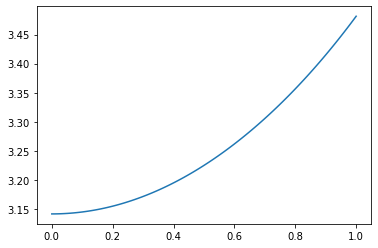

In [58]:
plt.plot(x_numérica, f_evaluada(x_numérica, y_numérica))

In [60]:
F

x**2 + y*sin(z)

In [63]:
#Sustituir variables
F.subs([(y,smp.cos(z)),(z,y)])

x**2 + sin(y)*cos(y)

## Cálculo

## Derivada

In [64]:
#Derivaremos la función sin(x)

In [65]:
smp.diff(smp.sin(x),x)

cos(x)

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [67]:
smp.diff(((1+smp.sin(x))/(1-smp.cos(x)))**2,x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

Encontrar $\partial f / \partial x$ y $\partial f / \partial y$  de $f(x,y)=y^2\sin(x+y)$

In [68]:
f=y**2*smp.sin(x+y)

In [69]:
smp.diff(f,x)

y**2*cos(x + y)

In [70]:
smp.diff(f,y)

y**2*cos(x + y) + 2*y*sin(x + y)

$\frac{\partial^3 f}{\partial x\partial y^2}$

In [71]:
smp.diff(f,y,y,x)

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

Derivar $$\frac{d}{dx} f(x+g(x)) $$

In [72]:
f,g =smp.symbols('f g', cls=smp.Function)

In [73]:
f

f

In [74]:
g

g

In [79]:
g=g(x)

In [80]:
f=f(x+g)

In [81]:
g

g(x)

In [82]:
f

f(x + g(x))

In [84]:
dfdx=smp.diff(f,x)

In [85]:
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [86]:
dfdx.subs([(g, smp.sin(x))])

(Derivative(sin(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [88]:
dfdx.subs([(g, smp.sin(x))]).doit()

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

### Límite

$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [90]:
smp.limit(smp.sin(x/2 + smp.sin(x)),x, smp.pi)

1

## Integrales

Integrales indefinidas

$$ \int \csc(x) \cot (x)  dx $$

In [92]:
smp.integrate(smp.csc(x)*smp.cot(x),x)

-1/sin(x)

In [93]:
# Se debe considerar que se suma una constante + C

Integrales definidas

$$\int_{0}^{\ln(4)}\frac{e^x dt}{\sqrt{e^{2x}+9}} $$

In [96]:
smp.integrate(smp.exp(x)/smp.sqrt(smp.exp(2*x)+9),(x,0,smp.log(4)))

-asinh(1/3) + asinh(4/3)

Integral definida con límites variables

$$\int_1^t x^{10} e^x dx $$

In [97]:
t=smp.symbols('t')

In [98]:
smp.integrate(x**10*smp.exp(x),(x,1,t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

## Ejemplo

La función de onda del átomo de hidrógeno

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \phi) $$

La distancia media entre núcleo y el electrón:

$$\left<r\right> = \int R_{nl}^2 r^3 dr$$

$$R_{nl}(r) =  \sqrt{\left(\frac{2}{na}\right)^3 \frac{(n-l-1)!}{2n[(n+1)!]}} e^{-r/na} \left(\frac{2r}{na}\right)^l \left[L_{n-l-1}^{2l+1}(2r/na)\right]$$

Cuál sería el valor de $<r>$ para el estado base $\psi_{100}$

Cuál sería el valor de $<r>$ para el estado $\psi_{200}$ y $\psi_{210}$

In [99]:
from sympy import assoc_laguerre

In [1]:
r, a, n, l=smp.symbols('r a n l',real=True, positive=True)

NameError: name 'smp' is not defined